In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
plt.style.use("ggplot")

2023-03-05 13:02:01.802820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


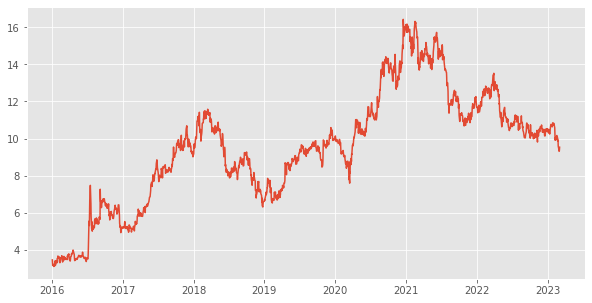

In [2]:
ticker = "NTDOY"
data = yf.Ticker(ticker).history(start=pd.to_datetime('2016-01-01'))[["Close"]]
plt.figure(figsize=(10,5))
plt.plot(data)

In [3]:
close = data.Close.values
training_data_len = math.ceil(len(close) * 0.8)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(close.reshape(-1, 1))
train = data_scaled[:training_data_len, :]

In [4]:
X_train = []
y_train = []
for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
test = data_scaled[training_data_len - 60:, :]
X_test =[]
y_test = close[training_data_len:]
for i in range(60, len(test)):
    X_test.append(test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer="Adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=100, batch_size=32)

2023-03-05 13:02:06.858794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
44/44 [==============================] - 12s 93ms/step - loss: 0.0314
Epoch 2/100
44/44 [==============================] - 4s 92ms/step - loss: 0.0057
Epoch 3/100
44/44 [==============================] - 4s 94ms/step - loss: 0.0053
Epoch 4/100
44/44 [==============================] - 5s 101ms/step - loss: 0.0053
Epoch 5/100
44/44 [==============================] - 4s 101ms/step - loss: 0.0054
Epoch 6/100
44/44 [==============================] - 4s 101ms/step - loss: 0.0048
Epoch 7/100
44/44 [==============================] - 5s 104ms/step - loss: 0.0043
Epoch 8/100
44/44 [==============================] - 4s 101ms/step - loss: 0.0053
Epoch 9/100
44/44 [==============================] - 4s 101ms/step - loss: 0.0042
Epoch 10/100
44/44 [==============================] - 5s 110ms/step - loss: 0.0039
Epoch 11/100
44/44 [==============================] - 4s 101ms/step - loss: 0.0037
Epoch 12/100
44/44 [==============================] - 4s 97ms/step - loss: 0.0036
Epoch 13/100
44/

In [9]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(np.mean(prediction - y_test) ** 2)
rmse

12/12 [==============================] - 0s 26ms/step


0.148450764020284

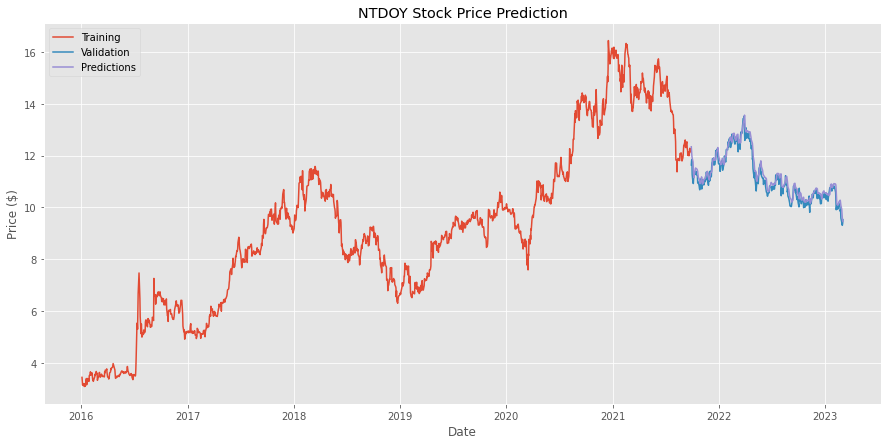

In [81]:
train = data[:training_data_len]
validation = data[training_data_len:].copy()
validation["Predictions"] = prediction
plt.figure(figsize=(15, 7))
plt.title("{} Stock Price Prediction".format(ticker))
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.plot(train)
plt.plot(validation[["Close", "Predictions"]])
plt.legend(['Training', 'Validation', "Predictions"], loc="upper left")
plt.show()

In [72]:
new_prediction = []
new_prediction.append(scaler.transform(prediction)[i-60:i, 0])

In [74]:
test = scaler.inverse_transform(model.predict(np.reshape(new_prediction, (1, -1, 1))))

1/1 [==============================] - 0s 35ms/step


In [76]:
test

array([[9.7267275]], dtype=float32)

In [78]:
new_prediction = np.append(new_prediction, test[0])

In [79]:
new_prediction

array([0.571823  , 0.56474066, 0.55868864, 0.55805784, 0.5594476 ,
       0.5595434 , 0.55740404, 0.5558179 , 0.5576717 , 0.5556939 ,
       0.54880166, 0.54180807, 0.54361314, 0.5512341 , 0.5595298 ,
       0.56535393, 0.5653653 , 0.56112224, 0.5598981 , 0.5594912 ,
       0.5606928 , 0.55979645, 0.5559859 , 0.5544858 , 0.5564985 ,
       0.55730253, 0.5539628 , 0.5524007 , 0.55470383, 0.5650927 ,
       0.5769032 , 0.58385503, 0.58534586, 0.58208114, 0.5770239 ,
       0.57472956, 0.57815826, 0.58425134, 0.5865461 , 0.5861456 ,
       0.58609587, 0.5861143 , 0.5851344 , 0.58012164, 0.5656663 ,
       0.54442453, 0.52851   , 0.52406657, 0.5245728 , 0.5264511 ,
       0.5281245 , 0.53291357, 0.5383112 , 0.5383486 , 0.53112173,
       0.52345693, 0.51253176, 0.49910295, 0.4866035 , 0.47857183,
       9.7267275 ], dtype=float32)